<a href="https://colab.research.google.com/github/sara2cb/Learning-Machine-Learning/blob/main/Learning_Learning%2C_from_Scratch_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Coursework I: Learning Learning, From-Scratch</h1>

We will be using two datasets that we will provide to you: Iris and MNIST. You will be provided with two subsets for each of the dataset, a training subset (XX train samples.npy and XX train labels.npy with XX the name of the dataset) and a validation subset (XX val samples.npy and XX val labels.npy). We withhold the test sub-sets of these two data sets and a hidden training set Hidden.

We will test correctness of your code on Hidden. An anonymised leader board with test subsets and on Hidden will be published at Moodle.

Iris dataset contains the following features in order: sepal length, sepal width, petal length, petal width. Classes names are: Iris Setosa for label 0, Iris Versicolour for label 1, and Iris Virginica for label 2.

Each exercise must be implemented from scratch. Libraries are allowed unless differently specified. We encourage to test the correctness of results using libraries.


# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler
import pandas as pd


iris_train_labels = np.load('./iris_train_labels.npy')
iris_train_samples = np.load('./iris_train_samples.npy')
iris_val_labels = np.load('./iris_val_labels.npy')
iris_val_samples = np.load('./iris_val_samples.npy')
mnist_train_labels = np.load('./mnist_train_labels.npy')
mnist_train_samples = np.load('./mnist_train_samples.npy')
mnist_val_labels = np.load('./mnist_val_labels.npy')
mnist_val_samples = np.load('./mnist_val_samples.npy')


# Useful functions

In [ ]:
#To plot a digit of mnist
def plot_digit(X, label):
  pixels = X.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.title(label)
  plt.show()

In [ ]:
#To plot a confusion matric
def plot_confusion_matrix(Y_real, y_pred):
  data = {'y_Actual':    Y_real,'y_Predicted': y_pred}
  df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
  confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
  print (confusion_matrix)

## <strong>Line Fitting (10 points)</strong>


**a) Implement the normal equation solver function nsolve, which takes as input the matrix X and the target vector y and returns the optimized weights w. (5 points)** 

In [ ]:
#Equation to calculate the linear optimize weights given some training data
def nsolve(X, Y):
  # W = (X^T X)^{-1} X^T y
  return np.dot(np.matmul(np.linalg.inv(np.matmul(X.T, X)) ,X.T) ,Y)

**b) Implement lineFit(X,y) which should fit a linear function to the input data. Test your implementation on the following task: predict with linear fitting the petal length (cm) of the Iris dataset using the three remaining variables as inputs (sepal length (cm), sepal width (cm) and petal width (cm)). Report the L2 loss on the validation set and plot a graph showing the correlation between y and your prediction on the validation set (2 points)**


In [ ]:
#Calculate the linear regression of some training data
def lineFit(X, y):
  #We add a feature in the data of ones to be able to calculat ethe offset
  x_train = np.c_[np.ones((len(X),1)), X]
  w = nsolve(x_train,y)
  return w

L2 Loss is: 1.6611081937563748
Average L2 Loss is: 0.11074054625042498


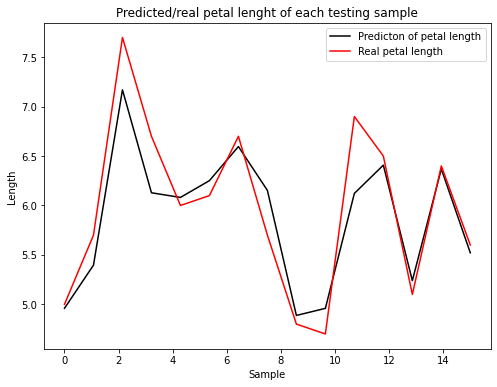

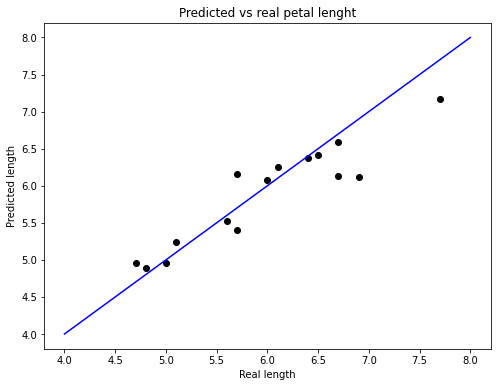

In [ ]:
#Training data
iris_train_noPetalLength = iris_train_samples[:,1:4]
#Training labels
iris_train_petalLength = iris_train_samples[:,0]
#Calculate optimised weights
w = lineFit(iris_train_noPetalLength, iris_train_petalLength)

#Testing data
iris_var_noPetalLength = iris_val_samples[:,1:4]
#Testing label
iris_var_petalLength = iris_val_samples[:,0]
#Calculate prediction given optimised weights
y =  w[0] + w[1]*iris_var_noPetalLength[:,0] + w[2]*iris_var_noPetalLength[:,1]
y +=+ w[3]*iris_var_noPetalLength[:,2]

#Compare results of each sample
plt.figure(figsize=(8, 6))
x = np.linspace(0, len(iris_val_samples[:,0]), len(iris_val_samples[:,0]))
plt.plot(x, y, color='black', label='Predicton of petal length');
plt.plot(x, iris_var_petalLength, color='red', label='Real petal length');
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Length')
plt.title('Predicted/real petal lenght of each testing sample')

#Compare results
idx = iris_var_petalLength.argsort()
yOrdered = y[idx]
lengthOrdered = iris_var_petalLength[idx]
plt.figure(figsize=(8, 6))
x = np.linspace(0, len(iris_val_samples[:,0]), len(iris_val_samples[:,0]))
plt.plot(lengthOrdered, yOrdered,'o', color='black', label='Predicton of petal length');
plt.plot([4, 8], [4, 8], color='blue', label='Predicton of petal length');
plt.xlabel('Real length')
plt.ylabel('Predicted length')
plt.title('Predicted vs real petal lenght')

#Calculate global and average L2 loss
L2loss = np.sum((iris_var_petalLength - y)**2)
print('L2 Loss is: ' + str(L2loss))
L2lossAvg = np.sum((iris_var_petalLength - y)**2)/len(y)
print('Average L2 Loss is: ' + str(L2lossAvg))

**c) Implement polyFit(X,y) which should fit a 2nd degree polynomial to the input data. Test your implementation on the following task: predict with the polynomial the petal width (cm) of the Iris dataset using the three remaining variables as inputs (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)). The 2nd degree polynomial should consider all possible pairwise terms, i.e. w1x2 + w2xy + w3y2 + w4x + w5y + w6 in the case of two input variables x and y. Report the L2 loss on the validation set and plot a graph showing the correlation between y and your prediction on the validation set (3 points)**

In [ ]:
#Calculate the polynomial regression of some training data
def polyFit(X, y):
  #Calculate number fo columns, since we need to add a column for every possible
  # pair combination
  noColumns = len(X[0])
  #Start with a column of ones for the offset
  x_train = np.column_stack([np.ones((len(X),1))])
  for i in range(noColumns):
    x_train = np.column_stack([x_train, X[:,i]])
    x_train = np.column_stack([x_train, X[:,i]* X[:,i]])
    for j in range(i+1, noColumns):
      x_train = np.column_stack([x_train, X[:,i]*X[:,j]])
  
  #Once we have adapted the data, we can calculate the polynomial regression
  # using the same method as beforee
  w = nsolve(x_train,y)
  return w

L2 Loss is: 1.8337135618760727
Average L2 Loss is: 0.12224757079173817


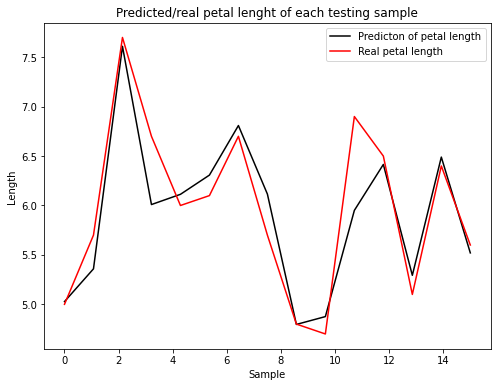

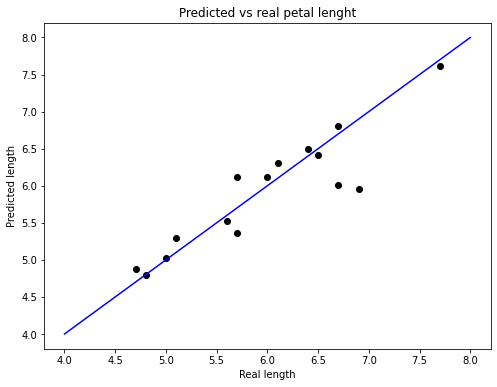

In [ ]:
#Training data
iris_train_noPetalLength = iris_train_samples[:,1:4]
#Training label
iris_train_petalLength = iris_train_samples[:,0]
#Calculated optimised weights
w = polyFit(iris_train_noPetalLength, iris_train_petalLength)

#Testing data
iris_var_noPetalLength = iris_val_samples[:,1:4]
#Testing label
iris_var_petalLength = iris_val_samples[:,0]
#Calculate predicted label by combining all possible pair columns
y =  w[0]   #Offset
wi = 1
for i in range(3):
  y += w[wi]*iris_var_noPetalLength[:,i]
  wi = wi+1
  y += w[wi]*iris_var_noPetalLength[:,i]*iris_var_noPetalLength[:,i]
  wi = wi+1
  for j in range(i+1, 3):
    y += w[wi]*iris_var_noPetalLength[:,i]*iris_var_noPetalLength[:,j]
    wi = wi+1

#Compare results of each sample
plt.figure(figsize=(8, 6))
x = np.linspace(0, len(iris_val_samples[:,0]), len(iris_val_samples[:,0]))
plt.plot(x, y, color='black', label='Predicton of petal length');
plt.plot(x, iris_var_petalLength, color='red', label='Real petal length');
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Length')
plt.title('Predicted/real petal lenght of each testing sample')

#Compare results
idx = iris_var_petalLength.argsort()
yOrdered = y[idx]
lengthOrdered = iris_var_petalLength[idx]
plt.figure(figsize=(8, 6))
x = np.linspace(0, len(iris_val_samples[:,0]), len(iris_val_samples[:,0]))
plt.plot(lengthOrdered, yOrdered,'o', color='black', label='Predicton of petal length');
plt.plot([4, 8], [4, 8], color='blue', label='Predicton of petal length');
plt.xlabel('Real length')
plt.ylabel('Predicted length')
plt.title('Predicted vs real petal lenght')

#Calculate global and average L2 loss
L2loss = np.sum((iris_var_petalLength - y)**2)
print('L2 Loss is: ' + str(L2loss))
L2lossAvg = np.sum((iris_var_petalLength - y)**2)/len(y)
print('Average L2 Loss is: ' + str(L2lossAvg))

## <strong>Clustering (14 points)</strong>

In [ ]:
#Calculate the loss of a single image
def lossOfReconstructionImage(orig, recon):
  return np.sum(np.abs(recon - orig)) / len(orig)
#Calculate the loss of a set of image
def lossOfReconstruction(orig, recon):
  return np.sum(np.abs(recon - orig)) / (len(orig)*len(orig[0]))

**a) Implement a function pca(X, ndims) that performs PCA over the input data X and returns both the mean vector Xmean and the ndims top components. The top components are the eigen vectors linked to the top eigen values computed from the covariance matrix. Try your function on the MNIST dataset, which is composed of 10 digit classes. Display the top 10 components fitted on the train dataset as images and check that you can reconstruct perfectly an input digit from the validation set using all components (7 points)**


In [ ]:
#Calculate principal component analysis given some data and the number of top 
# components
def pca(X, ndims):
  x_stn = StandardScaler().fit_transform(X)
  #Mean
  xmean = np.sum(x_stn)/(len(x_stn)* len(x_stn[0]))
  xmeanDev = x_stn - xmean
  
  #Covariance
  cov = np.cov(x_stn.T)

  #Eigen values and eigen vectors
  eigVal, eigVec = np.linalg.eig(cov)

  #Sort eigen values and vectors
  idx = eigVal.argsort()[::-1]  
  eigenValues = eigVal[idx]
  eigenVectors = eigVec[:,idx]

  #Subset of eigen vectors as basis vectors
  topEigVec = eigenVectors[:,0:ndims]

  #Calculate score to be able to reconstruct image
  score = np.matmul(X, topEigVec)
  return xmean, topEigVec, score

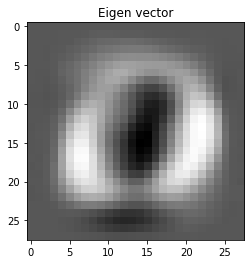

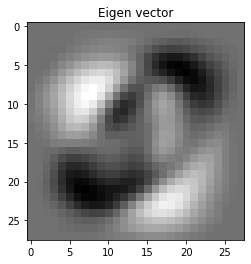

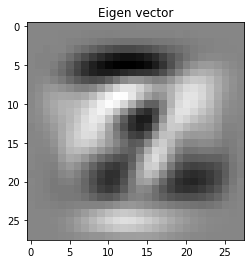

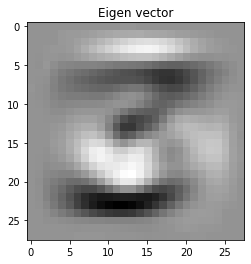

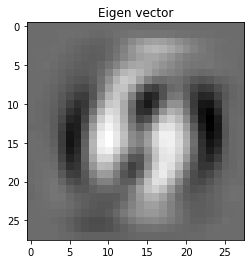

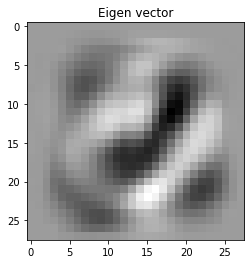

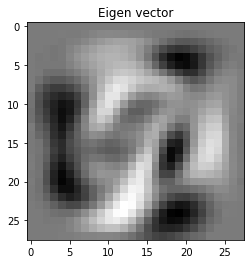

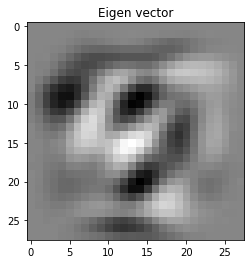

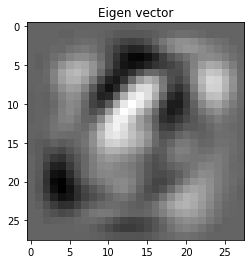

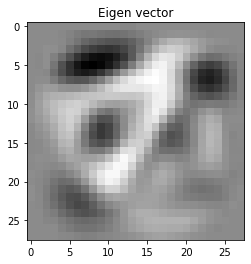

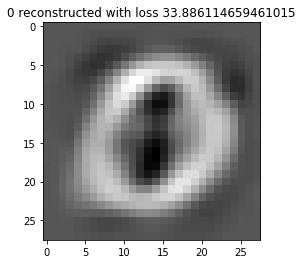

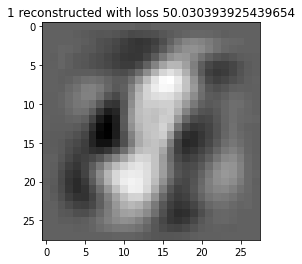

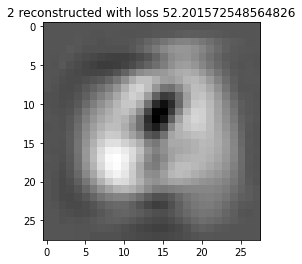

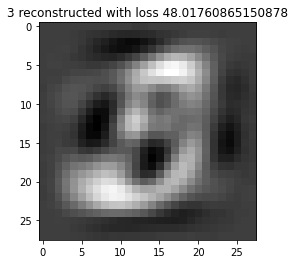

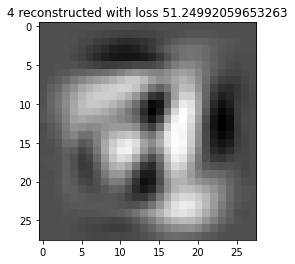

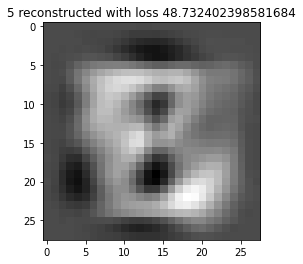

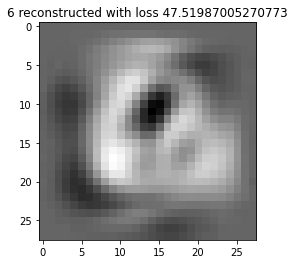

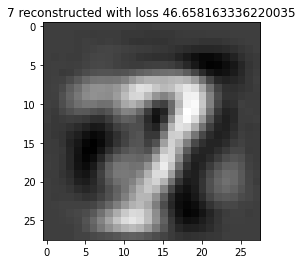

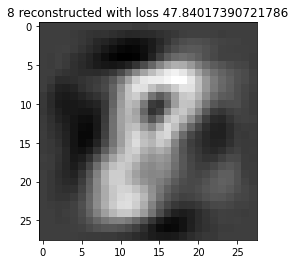

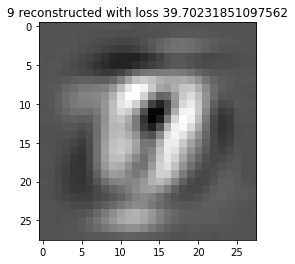

Total average loss 46.58385385872098


In [ ]:
#Calculate pca on mnist
XMean, eigenVector, score = pca(mnist_train_samples, 10)
#Plot eigen vectors
for i in range(10): 
  plot_digit(eigenVector.T[i], "Eigen vector")

#Reconstruct an image of each digit
X_reconstructed =  np.matmul(score, eigenVector.T) + XMean
top10Rec = np.zeros((10, len(X_reconstructed[0])))
for i in range(len(X_reconstructed)): 
  if top10Rec[mnist_train_labels[i]].all() == 0:
    top10Rec[mnist_train_labels[i]] = X_reconstructed[i]

#Plot reconstructions with the loss
for i in range(10): 
  loss = lossOfReconstructionImage(mnist_train_samples[i], top10Rec[i])
  label = str(i) +" reconstructed with loss " + str(loss)
  plot_digit(top10Rec[i], label )

print("Total average loss "+  str(lossOfReconstruction(mnist_train_samples[0:10], top10Rec)))

**b) Perform independent research on the clustering algorithm k-means. Implement a function kmeans performing k-means on input data X. Propose the interface to that function (i.e., what is its input and output?) and write in three sentences why this is. Apply you Kmeans implementation on the MNIST training set with k = 10 clusters and display the centroids as images (5 points).**

**Answer:** KMeans(dataPoints->X, numberCentroids->k, labels->y): return predictionLabels, centroids, labClusters 

In order to implement the kMeans method we need the data point that we will cluster and how many custers (this would be the k) we will be dividing the data into. We will return the info of the centroids to check what the reconstruction of each difit looks like. Since part of the aim of this function is to return the label classification of each MNIST data as well as the labels of each cluster we will need the label of each data for this.

In [ ]:
def kMeans(X, k, y):
  #Initialise centroid in a random data point 
  centroids = np.zeros((k, len(X[0])))
  for i in range(0, k):
    indexRandomCentrod = np.random.randint(len(X))
    centroids[i] = X[indexRandomCentrod]
  clusterAssigned = np.zeros( len(X))
  

  
  #Loop to update centroid and clustees
  hasChanged = True
  while hasChanged:
    centroidsData = {i: [] for i in range(k)}
    centroidsLabel = {i: [] for i in range(k)}
    #Assign each point to closest centroid
    for j in range(len(X)):
      smallestDistance = float("inf")
      for i in range(k):
        distance = np.linalg.norm(X[j] - centroids[i])
        if distance < smallestDistance:
          closestCentroidIndex = i
          smallestDistance = distance
      centroidsData[closestCentroidIndex].append(X[j])

      #Variables for label classification
      centroidsLabel[closestCentroidIndex].append(y[j])
      clusterAssigned[j] = closestCentroidIndex

    
    hasChanged =  False
    #Recalculate centroid
    for i in range(0, k):
      newCentroid =  sum(centroidsData[i]) / len(centroidsData[i])
      if np.linalg.norm(newCentroid - centroids[i]) > 0:
        hasChanged = True
      centroids[i] = newCentroid

  #Calculate label assigned for each cluster depending on the mayority of labels
  # of the points assigned to the cluster of this centroid
  labelsOfCluster = np.zeros(k)
  for i in range(0, k):
    labelsOfCluster[i] = int(np.argmax(np.bincount(centroidsLabel[i])))
  #Prediction labels of each point
  returnLabels = np.zeros(len(X))
  for j in range(0, len(X)):
    returnLabels[j] = labelsOfCluster[int(clusterAssigned[j])]
  
  return returnLabels, centroids, labelsOfCluster

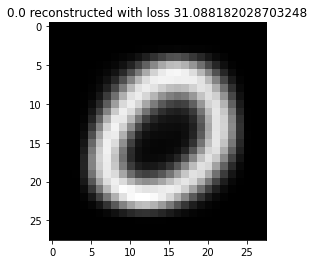

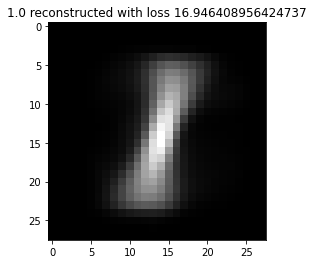

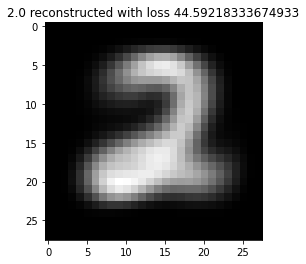

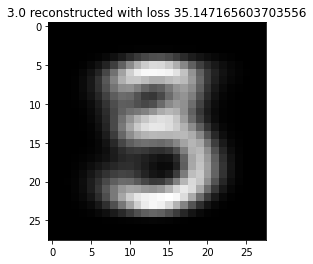

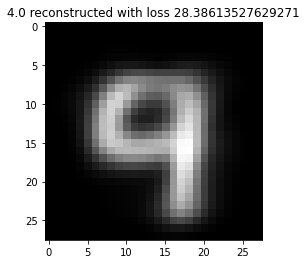

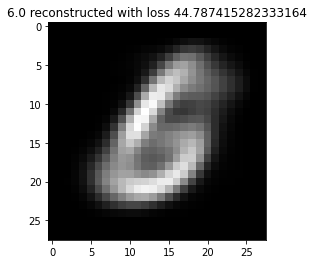

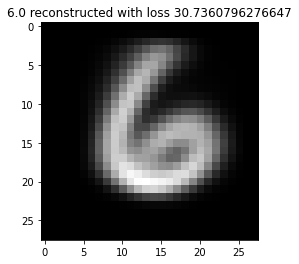

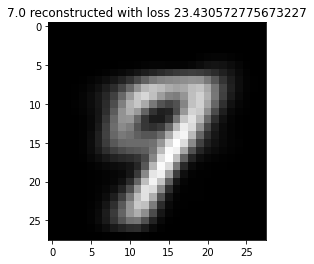

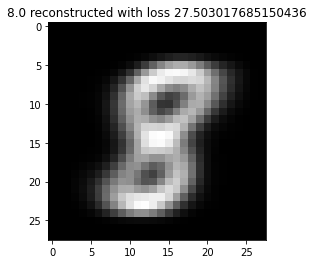

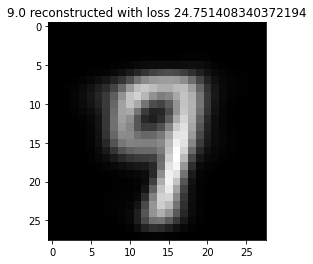

Total average loss 30.73685689130673


In [ ]:
#Calculate kMeans
labels, centroids, labClus = kMeans(mnist_train_samples, 10, mnist_train_labels)
idx = labClus.argsort()
labClus = labClus[idx]
centroids = centroids[idx]

#Plot each centroid (this would be our "reconstruction")
average = 0
for j in range(0, 10):
  label = str(labClus[j])
  for i in range(len(mnist_train_samples)):
    if mnist_train_labels[i]  == labClus[j]:
      loss = lossOfReconstructionImage(mnist_train_samples[i], centroids[j])
      average = average+loss
      label = str(labClus[j]) +" reconstructed with loss " + str(loss)
      break
  plot_digit(centroids[j], label)
print("Total average loss "+  str(average/10))

**c) Describe the k-means algorithm, highlighting similarities and differences from KNN. Compare the reconstruction loss on the validation set for both k-means and PCA. Write no more than a third of a page. (2 points)**

**Answer:** When comparing the reconstructions of the PCA and the KNN implementation visually we can see that the kNN does result in more recognisable numbers. This can be seen reflected in the average loss per image which for the PCA would 40 pixels difference per image and 30 for the kNN.  This might be surprising because for the reconstruction in PCA we are constructing based on a specific image that we are comparing to while for the kNN we compare again a sample image with the same label than the reconstructed image. However, in the case of the PCA we are calculating the eigenVector and eigenValue since this represents how the direction of each pixel by which the image is stretched, while for the kNN we calculate the average of all the points that were clustered. Therefore, this explains why the images reconstructed by the kNN look more similar to the original images. However, while for the PCA we do get a reconstruction of each digit of MNIST, in kNN 5 was not reconstructed since they were probably classified scatteredly.

## <strong>Linear Classification (26 points)</strong>

**a) Implement the normal equation-based binary linear classifier lclass(examplesA, examplesB, testExample) where the first two arguments are the set of samples from class A and class B respectively and the third is the test. The function should return 0 if test is in A and 1 otherwise. It should, for simplicity, both train and test in one function call. (5 points)**

In [ ]:
#Linear classification
def lclass(examplesA, examplesB, testExample):
  #Adapt out data for calculating linear regression
  samples = np.concatenate((examplesA, examplesB), axis=0)
  labels = np.concatenate([np.zeros(len(examplesA)), np.ones(len(examplesB))])
  samples = np.c_[samples, np.ones((len(samples),1))]

  #Calculate linear regression which will act as out linear classification
  w = nsolve(samples,labels)

  #Plot weights
  plt.figure(figsize=(8, 6))
  x = np.linspace(0, 4, 5)
  plt.plot(x, w, color='black', label='Linear weights');
  plt.legend()
  plt.xlabel('Parameter')
  plt.ylabel('Weight')

  #Calculate prediction
  pred = np.zeros(len(testExample))
  for i in range(len(testExample)):
    if (np.append(testExample[i], 1) @ w) > 0.5:
      pred[i] = 1
  return pred

**b) Test this on all the samples in Iris, Setosa vs non-Setosa, etc and propose a simple analysis (text, figure, table) of the result you find, but not longer than the third of a page. (6 points)**

**Answer:** The weights of each parameter (sepal length, sepal width, petal length, petal width and offset) are represented in the figure below. We can see in the confusion matrix that this is a very successful classification (no misclassification). This can be explained because the correlation between the feature of the flowers and the type of flower is actually linear.

Confusion matrix of setosa (1) vs non-setosa (0)
Predicted  0.0  1.0
Actual             
0.0         10    0
1.0          0    5


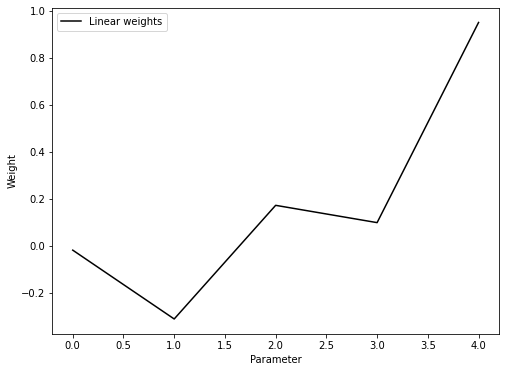

In [ ]:
#Separate setosa vs nonsetosa
examplesLabelA = []
examplesLabelB = []
for i in range(len(iris_train_labels)):
  if iris_train_labels[i] == 0:
    examplesLabelA.append(iris_train_samples[i])
  else:
    examplesLabelB.append(iris_train_samples[i])
#Make linear classification
predictedLabels = lclass(examplesLabelA, examplesLabelB, iris_val_samples)
  
#Plot confusion matrix
print("Confusion matrix of setosa (1) vs non-setosa (0)")
set_nonSet = np.zeros(len(iris_val_labels))
for i in range(len(set_nonSet)):
  if iris_val_labels[i] >0:
    set_nonSet[i] = 0
  else:
    set_nonSet[i] = 1
  if predictedLabels[i] ==0:
    predictedLabels[i] = 1
  else:
    predictedLabels[i] = 0
plot_confusion_matrix(set_nonSet, predictedLabels)

**c) Perform independent research how to do multi-class classification. Implement lmclass(examples, class, testExample) that performs multi-class classification of the examples examples according to the vector of labels class of the same size and tests it with testExample by returning the vector probability of being class i. (10 points)**

In [ ]:
#One vs all multiclass classification
def lmclass(examples, labels, testExamples):
  #Separate samples by each label
  noLabels =max(labels)
  samplesByLabel = {i: [] for i in range(noLabels+1)}
  for i in range(len(labels)):
      samplesByLabel[labels[i]].append(examples[i])

  #Add column of ones to testing data for the offset
  testExamples =  np.c_[testExamples, np.ones((len(testExamples),1))]

  #Calculate the results for comparing a label against the rest
  w = {i: [] for i in range(noLabels+1)}
  resultsEachTest = np.zeros((len(testExamples), noLabels+1))
  for i in range(noLabels+1):
    #Adapt the samples of labels so that it's current label against the rest
    samples = samplesByLabel[i]
    labelsOrdered = np.ones(len(samplesByLabel[i]))
    for j in range(noLabels+1):
      if j!=i:
        samples = np.concatenate((samples, samplesByLabel[j]), axis=0)
        labelsOrdered = np.concatenate([labelsOrdered, np.zeros(len(samplesByLabel[j]))])
    samples = np.c_[samples, np.ones((len(samples),1))]
    
    #Current label weights
    w= nsolve(samples,labelsOrdered)
    for j in range(len(testExamples)):
      resultsEachTest[j][i] = np.matmul(testExamples[j], w)

  #Label will be whichever gets highest result
  return np.argmax(resultsEachTest, axis=1)
  

**d) Present findings applying multi-class classification on Iris dataset with 3 classes. You can include figures and tables if needed. Write no longer than third of a page. (5 points)**

**Answer:** I implemented a one-vs-rest a multiclass classification using linear classifiers. This means that each point is classified for each class against the other classes. We can see in the confusion matrix that this method worked quite well with only 2 misclassifications. This could be improved by implementing a one-vs-one classification vecause this way samples of flowers with characteristics that could be classified as multiple classes or no classes they would actually be assigned depending on the closeness to each class.

In [ ]:
predictedLabels = lmclass(iris_train_samples, iris_train_labels, iris_val_samples)
print("Confusion matrix setosa(0), versicolour(1) and virginica(2)")
plot_confusion_matrix(iris_val_labels, predictedLabels)

Confusion matrix setosa(0), versicolour(1) and virginica(2)
Predicted  0  1  2
Actual            
0          5  0  0
1          0  2  1
2          0  1  6


# <strong>Non-Linear Classification (25 points)</strong>


In [ ]:
def loss_function(preds, targets):
  cost = -np.sum(targets * np.log(preds)) - np.sum((1-targets) * np.log(1 - preds))
  return cost

def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

#Prediction given data and weights
def sgn_predict( X, W):
    z = np.dot(X, W)
    out = np.sign(z)
    return out

**a) Implement classification based on logistic regression using GD by implementing the gradient function deLogistic(preds, X, Y) and optimizing using GD preds are the prediction from the model, X are the data and Y are the labels. (5 points)**

In [ ]:
#Normalised gradient
def gradient(preds, X, Y):
  return (preds-Y)@X / len(X[0])

#Logistic classification
def deLogistic(W, X, Y):
  step_size = 0.0001
  max_it = 10000
  best_loss = float('+inf')
  best_w = None
  X_Ones = np.c_[np.ones((len(X),1)), X]
  #Start gradient descent
  for it in range(max_it):
    #Calculate prediction
    z = np.dot(X_Ones, W)
    preds = sigmoid(z)
    #Current loss
    loss = loss_function(preds, Y)
    if loss < best_loss:
      best_w = W
    #Update weight
    J = gradient(preds, X_Ones, Y)
    W = W - step_size * J
  return best_w

#Initialised variables for logistic classification
#SETOSA VS VERSICOLOUR
x_train = np.hstack((iris_train_samples, np.ones((iris_train_samples.shape[0], 1))))
wFirst =  np.zeros(x_train.shape[1])
labels = []
for i in range(len(iris_train_labels)):
  if iris_train_labels[i] ==0:
    labels.append(0)
  elif iris_train_labels[i] ==1:
    labels.append(1)

#Calculate final weights
w = deLogistic(wFirst,iris_train_samples , iris_train_labels)

#Plot confusion matrix
print("Confusion matrix setosa(0) versus versicolour(1)")
test_ones = np.c_[np.ones((len(iris_val_samples),1)), iris_val_samples]
z = np.dot(test_ones, w)
preds = sigmoid(z).astype(np.int64)
set_nonSet = np.zeros(len(iris_val_labels))
for i in range(len(set_nonSet)):
  if iris_val_labels[i] >0:
    set_nonSet[i] = 1
  else:
    set_nonSet[i] = 0
plot_confusion_matrix(set_nonSet, preds)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Confusion matrix setosa(0) versus versicolour(1)
Predicted  0  1
Actual         
0.0        5  0
1.0        4  6


**b) Implement classification based on hinge loss (5 points) using GD by implementing the gradient function deHinge(preds, W, x, y) and optimizing using GD preds are the prediction from the model, W describes the model parameters, x is the data and y represent the labels. (5 points)**

In [ ]:
#hinge loss
def loss_functionHinge(z, targets, W):
  z = np.reshape(z, (-1, 1))
  distances = 1 - targets * z
  distances[distances < 0] = 0  # equivalent to max(0, distance)
  hinge_loss = (np.sum(distances) / len(targets))
  # calculate cost
  cost = 1 / 2 * np.dot(W, W) + hinge_loss
  return cost
  
#Gradient of the hinge
def gradientHinge(z, W, X, Y):
  grad = np.zeros(len(W))
  for (xi,yi) in zip(X,Y):
      v = yi*np.dot(W,xi)
      if v < 1:
        grad =  grad + -yi*xi
      else:
        grad = np.zeros(len(W))
  return grad

def deHinge(z, W, x, y):
  step_size = 0.0001
  max_it = 10000
  checkpoint_step = int(max_it / 40)
  one = np.ones(y.shape[0])
  
  #Gradient descent
  for it in range(max_it):
    #Predictiton
    z = np.dot(x, W)
    loss = loss_functionHinge(z, y, W)
    #Gradient hinge
    J_w = gradientHinge(z, W, x, y)
    #Stop when predictions can not be improved anymore
    if sum(J_w) == 0:
      print('[{:05}] current loss: {}'.format(it, loss))
      break
    #Update weight
    W = W - step_size * J_w
    if (it + 1) % checkpoint_step == 0:
      print('[{:05}] current loss: {}'.format(it, loss))
  return W

#Data for hinge classification
x_train = np.c_[np.ones((len(iris_train_samples),1)), iris_train_samples]
x_labels = []
for i in range(len(iris_train_labels)):
  if iris_train_labels[i] ==0:
    x_labels.append(-1)
  else:
    x_labels.append(1)
x_labels = np.array(x_labels)
w = np.ones(x_train.shape[1])
z = np.dot(x_train, w)

#Hinge classification
w = deHinge(z, w, x_train , x_labels)

#Prediction on testing data
test_ones = np.c_[np.ones((len(iris_val_samples),1)), iris_val_samples]
preds = sgn_predict(test_ones, w)

#Plot confusion matrix
print("Confusion matrix of setosa (1) vs non-setosa (0)")
set_nonSet = np.zeros(len(iris_val_labels))
for i in range(len(set_nonSet)):
  if iris_val_labels[i] >0:
    set_nonSet[i] = 0
  else:
    set_nonSet[i] = 1
  if preds[i] ==-1:
    preds[i] = 1
  else:
    preds[i] = 0
plot_confusion_matrix(set_nonSet, preds)


[00249] current loss: 438.6482522877506
[00499] current loss: 364.29697820441794
[00749] current loss: 290.0441728710877
[00999] current loss: 215.889836287756
[01249] current loss: 141.93658045442456
[01499] current loss: 106.00499503775758
[01514] current loss: 104.55512606567339
Confusion matrix of setosa (1) vs non-setosa (0)
Predicted  0.0  1.0
Actual             
0.0         10    0
1.0          0    5


**c) Implement kernel SVM function ksvm(kernel, x, y, xtest). The function takes as input a kernel, training data and a set of test points. The function returns the set of support vectors along with the predicted labels. You are allowed to use scipy optimization library to solve the quadratic problem of SVM. (10 points)**

In [ ]:
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize

#Training samples
xForFun = np.c_[np.ones((len(iris_train_samples),1)), iris_train_samples]
labelForFun = []
for i in range(len(iris_train_labels)):
  if iris_train_labels[i] ==0:
    labelForFun.append(-1)
  else:
    labelForFun.append(1)
labelForFun = np.array(labelForFun)

#Function for each kernel
def polynomialKernel(x, xi):
  return (1 + x @ xi.T)**2

def radialKernel(x, xi):
  return np.exp(np.abs(x-xi)**2 / (2*sigma))

def sigmoidKernel(x, xi):
  return np.tanh(alpha*(x@xi.T) + c)
kernelToUse = polynomialKernel

#Function alphas to minimise to calculate the svm
def functionAlphas(a):
  secondpart = 0
  y = labelForFun
  x = xForFun
  for i in range(len(a)):
    for j in range(len(a)):
      secondpart += y[i] * a[i] * kernelToUse(x[i], x[j]) * y[j] * a[j]
  return -np.sum(a) + secondpart/2

#The sum of the alphas times the labels has to be zero
def constraintY(a):
  return np.sum(labelForFun*a)

def ksvm(kernel, x, y, xtest):
  #Initialise parameters
  sigma = 1.0
  alpha = 1/len(x)
  c = 0.1

  #Assign kernel and other variables to choose
  if kernel== 'poly':
    kernelToUse = polynomialKernel
  elif kernel == 'rad':
    kernelToUse = radialKernel
  else:
    kernelToUse = sigmoidKernel
  xForFun = x
  labelForFun = y
  alphas = np.ones(len(x))
  constraintY(alphas)
  bounds = Bounds(0, 1/(sigma*2*len(x)))

  #Minimise alphas
  con = {'type': 'eq', 'fun':constraintY}
  res = minimize(functionAlphas, alphas, method='trust-constr', constraints=[con], bounds=bounds)
  alphas = res.x
  W = alphas*y@x

  #Calculate support vectors with smallest margins
  minSupVecPos = []
  minVec = 1000000
  maxSupVecNeg = []
  minVecN = -1000000
  for i in range(len(x)):
    res = np.dot(x[i], W)
    if res > 0:
      if minVec > res:
        minSupVecPos = [x[i].tolist()]
        minVec = res
      elif minVec == res:
        minSupVecPos.append(x[i].tolist())
    elif res < 0:
      if minVecN < res:
        maxSupVecNeg = [x[i].tolist()]
        minVecN = res
      elif minVecN == res:
        maxSupVecNeg.append(x[i].tolist())
  minSupVecPos = np.array(minSupVecPos)
  maxSupVecNeg = np.array(maxSupVecNeg)

  #Make prediction
  preds = sgn_predict(xtest, W)
  
  return minSupVecPos, maxSupVecNeg, preds

#Calculate SVM
x_labels = labelForFun
x_train = xForFun
test_ones = np.c_[np.ones((len(iris_val_samples),1)), iris_val_samples]
supportVectorsP, supportVectorsN, preds = ksvm('poly', x_train , x_labels, test_ones)
print("Support vectors:")
print(supportVectorsP, supportVectorsN)

#Plot confusion matrix
print("Confusion matrix of setosa (1) vs non-setosa (0)")
set_nonSet = np.zeros(len(iris_val_labels))
for i in range(len(set_nonSet)):
  if iris_val_labels[i] >0:
    set_nonSet[i] = 0
  else:
    set_nonSet[i] = 1
  if preds[i] ==-1:
    preds[i] = 1
  else:
    preds[i] = 0
plot_confusion_matrix(set_nonSet, preds)

  

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


Support vectors:
[[1.  5.1 3.8 1.9 0.4]] [[1.  5.  3.5 1.6 0.6]]
Confusion matrix of setosa (1) vs non-setosa (0)
Predicted  0.0  1.0
Actual             
0.0         10    0
1.0          1    4


## <strong>Neural Network (25 points)</strong>

**a) Devise a three-layer neural network with n hidden states and sigmoid activations for classification. Explain how many parameters this has in one sentence. (2 points)**

**Answer:** If we divise a neural network with 3 hidden layers the parameters will be 4 set of weights and 4 set of biases.

**b) Provide the equation for the gradient using chain rule for the network in point a). (8 points)**

**Answer:** To calculate the gradient let us define:
```
input = weight_set · data + bias

pred = sigmoid( input )

Loss = 0.5 * sum( (pred - real_label)^2
```
For the gradient we need to calculate:

*d(Loss)/d(weight_set)*

Which using the chain rule we can calculate:

d(Loss)/d(weight_set) =

dL/dPred · dPred/dInput · dInput/dWeight_set = 

dL/dInput · dInput/dWeight_set 

We combine one of the derivatives since *dL/dInput* will be calculated different depending onthe layer. The *data* in *input* would actually be the result from the previous layer (except for the input layer which is the real data). So we simplify creating a function that asks for the *dL/dInput* already, which would be calculated by:

Output layer: dL/dInput = prediction - labels


The rest: weights_layer_forward · dL/dInput_forward * sigmoid_derivative(predicion_current_layer)



In [ ]:
def gradient_LossByWeights(dInput, x):
  return np.dot(dInput, x.T)

**c) Implement the binary classifier nnclass(examplesA, examplesB, testExample) that is trained with your implementation of (stochastic) GD and your gradient function using the network. (10 points)**

In [ ]:
def gradient_LossByBias(dZ):
  return np.sum(dZ, axis=1, keepdims=True)

def sigmoid_derivative(x):
    return x*(1-x)

def squaredLoss(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_pred - y_true, 2))

def sigmoid(z):
  z = np.clip(z, -500, 500)
  return 1.0 / (1 + np.exp(-z))

In [ ]:
def nnclass(examplesA, examplesB, testExamples, n, learningRate, epoch, timesPrint):
  #Adapt samples and labels
  samples = np.concatenate((examplesA, examplesB), axis=0).T
  labels = np.concatenate([np.zeros(len(examplesA)), np.ones(len(examplesB))])
  labels = labels[:len(labels)].reshape(1,len(labels))

  #Initisialise weights and bias
  weightsHidden1 = np.random.randn(n, len(samples))
  weightsHidden2 = np.random.randn(n, n)
  weightsHidden3 = np.random.randn(n, n)
  weightsOutput = np.random.randn(1, n)
  biasHidden1 = np.random.randn(n, 1)
  biasHidden2 = np.random.randn(n, 1)
  biasHidden3 = np.random.randn(n, 1)
  biasOutput = np.random.randn(1,1)
  
  for i in range(epoch):
    #Calculate prediction and results of each layer
    zHidden1 = np.dot(weightsHidden1, samples) + biasHidden1
    predHidden1 = sigmoid(zHidden1)
    zHidden2 = np.dot(weightsHidden2, predHidden1) + biasHidden2
    predHidden2 = sigmoid(zHidden2)
    zHidden3 = np.dot(weightsHidden3, predHidden2) + biasHidden3
    predHidden3 = sigmoid(zHidden3)
    zOutput = np.dot(weightsOutput, predHidden3) + biasOutput
    predOutput = sigmoid(zOutput)

    #Calculate cost or loss
    cost  = squaredLoss(predOutput, labels)

    #Calculate gradient of weights and bias of output layer
    dZOutput = predOutput-labels
    dWOutput = gradient_LossByWeights(dZOutput, predHidden3)
    dBOutput = gradient_LossByBias(dZOutput)
    #Calculate gradient of weights and bias of third hidden layer
    dZHidden3 = np.dot(weightsOutput.T, dZOutput) * sigmoid_derivative(predHidden3)
    dWHidden3 = gradient_LossByWeights(dZHidden3, predHidden2)
    dBHidden3 = gradient_LossByBias(dZHidden3)
    #Calculate gradient of weights and bias of second hidden layer
    dZHidden2 = np.dot(weightsHidden3.T, dZHidden3) * sigmoid_derivative(predHidden2)
    dWHidden2 = gradient_LossByWeights(dZHidden2, predHidden1)
    dBHidden2 = gradient_LossByBias(dZHidden2)
    #Calculate gradient of weights and bias of first hidden layer
    dZHidden1 = np.dot(weightsHidden2.T, dZHidden2) * sigmoid_derivative(predHidden1)
    dWHidden1 = gradient_LossByWeights(dZHidden1, samples)
    dBHidden1 = gradient_LossByBias(dZHidden1)

    #Update weights and bias
    weightsHidden1 -= learningRate * dWHidden1
    weightsHidden2 -= learningRate * dWHidden2
    weightsHidden3 -= learningRate * dWHidden3
    weightsOutput -= learningRate * dWOutput
    biasHidden1 = biasHidden1 - learningRate * dBHidden1
    biasHidden2 = biasHidden2 - learningRate * dBHidden2
    biasHidden3 = biasHidden3 - learningRate * dBHidden3
    biasOutput = biasOutput - learningRate * dBOutput

    if i % (epoch/timesPrint)== 0:
        print("Epoch", i, "cost: ", cost)

  #Make prediction of testing data
  zHidden1 = np.dot(weightsHidden1, testExamples.T) + biasHidden1
  predHidden1 = sigmoid(zHidden1)
  zHidden2 = np.dot(weightsHidden2, predHidden1) + biasHidden2
  predHidden2 = sigmoid(zHidden2)
  zHidden3 = np.dot(weightsHidden3, predHidden2) + biasHidden3
  predHidden3 = sigmoid(zHidden3)
  zOutput = np.dot(weightsOutput, predHidden3) + biasOutput
  predOutput = sigmoid(zOutput)

  return (predOutput>.8)[0,:]

#Setosa vs non-Setosa
examplesLabelA = []
examplesLabelB = []
for i in range(len(iris_train_labels)):
  if iris_train_labels[i] == 0:
    examplesLabelA.append(iris_train_samples[i])
  else:
    examplesLabelB.append(iris_train_samples[i])

#Train and test on neural network
predictedLabels = nnclass(examplesLabelA, examplesLabelB, iris_val_samples, 16, 0.01, 500, 10)

#Plot confusion matrix
print()
print("Confusion matrix of setosa (1) vs non-setosa (0)")
set_nonSet = np.zeros(len(iris_val_labels))
for i in range(len(set_nonSet)):
  if iris_val_labels[i] >0:
    set_nonSet[i] = 0
  else:
    set_nonSet[i] = 1
  if predictedLabels[i] ==0:
    predictedLabels[i] = 1
  else:
    predictedLabels[i] = 0
plot_confusion_matrix(set_nonSet, predictedLabels)

Epoch 0 cost:  15.5710468971236
Epoch 50 cost:  0.014371033530495417
Epoch 100 cost:  0.002970002683955325
Epoch 150 cost:  0.0011901039656670178
Epoch 200 cost:  0.0006239688407984841
Epoch 250 cost:  0.0003791471950026548
Epoch 300 cost:  0.00025291250836473035
Epoch 350 cost:  0.00017990140571715876
Epoch 400 cost:  0.00013410830433235483
Epoch 450 cost:  0.00010360188415329299
Confusion matrix of setosa (1) vs non-setosa (0)
Predicted  False  True 
Actual                 
0.0           10      0
1.0            0      5


**d) Do an analysis how changes of n affect the accuracy, not longer than a third of a page. A table and / or plot is welcome. Pay attention to table formatting and labels. (5 points)**

**Answer:** We can see when testing with many number of states, the more states we add the higher the accuracy will be. This is because the higher the states the more weighted input connections we can build, which means we can have a more specific weight set for each layer. However, a constraint when it comes to number of states would be the machine-power, as the more the states the longer it will take to compute the neural network.

However, we also notice that after a certain number of states the accuracy does not vary much, this is because if we put more states than the number of constraints in each sample we would have more states than input connections necessary. So it is not needed to put a too high number of samples.

Number states 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


Epoch 0 cost:  6581.202849823109
Epoch 40 cost:  1997.8893205005306
Epoch 80 cost:  1997.734057353954
Epoch 120 cost:  1997.6204919359184
Epoch 160 cost:  1997.518586888505
Number states 2
Epoch 0 cost:  5958.373070405997
Epoch 40 cost:  1994.0771802839577
Epoch 80 cost:  1990.13349795173
Epoch 120 cost:  1977.3035433634375
Epoch 160 cost:  1892.1509008954768
Number states 4
Epoch 0 cost:  16250.030614008763
Epoch 40 cost:  1776.290363590987
Epoch 80 cost:  1103.7518508638848
Epoch 120 cost:  556.3273231843717
Epoch 160 cost:  469.4219701280759
Number states 8
Epoch 0 cost:  2044.692706417023
Epoch 40 cost:  1293.6243463535145
Epoch 80 cost:  609.4474469573055
Epoch 120 cost:  484.03385516227894
Epoch 160 cost:  359.39200616178005
Number states 16
Epoch 0 cost:  18132.18522068852
Epoch 40 cost:  1000.4847464258867
Epoch 80 cost:  428.3937791356568
Epoch 120 cost:  353.5475438911025
Epoch 160 cost:  295.04733565728645
Number states 32
Epoch 0 cost:  7013.247885909078
Epoch 40 cost:  861

Text(0.5, 1.0, 'Accuracy with respect to number of states')

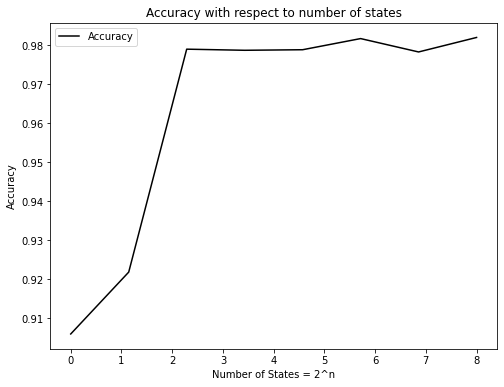

In [ ]:
#Data for training and testing 
trainingData = mnist_train_samples
trainingLabels = mnist_train_labels
testingData = mnist_val_samples
testingLabels = mnist_val_labels
examplesLabelA = []
examplesLabelB = []
for i in range(len(trainingLabels)):
  if trainingLabels[i] == 0:
    examplesLabelA.append(trainingData[i])
  else:
    examplesLabelB.append(trainingData[i])
noStates = 1

#Train and test with different number of states
predictedLabels = []
timesTesting = 8
for i in range(timesTesting):
  print("Number states " + str(noStates))
  predictedLabels.append(nnclass(examplesLabelA, examplesLabelB, testingData, noStates, 0.0001, 200, 5)) 
  noStates = noStates*2

#Calculate accuracy
preds = np.zeros((timesTesting, len(testingLabels)))
set_nonSet = np.zeros(len(testingLabels))
accuracy = np.zeros(timesTesting)
for i in range(len(set_nonSet)):
  if testingLabels[i] >0:
    set_nonSet[i] = 1
  else:
    set_nonSet[i] = 0
  for j in range(timesTesting):
    if predictedLabels[j][i] == True:
      preds[j][i] = 1
    else:
      preds[j][i] = 0
    if preds[j][i] == set_nonSet[i]:
        accuracy[j] = accuracy[j] +1
accuracy = accuracy / len(testingLabels)
noStates = 1
print()
for j in range(timesTesting):
  print("The accuracy for " + str(noStates) + " states is " + str(round(accuracy[j], 4)))
  noStates = noStates*2

print()
#Plot accuracy with respect to number states
plt.figure(figsize=(8, 6))
x = np.linspace(0, timesTesting, timesTesting)
plt.plot(x, accuracy, color='black', label='Accuracy');
plt.legend()
plt.xlabel('Number of States = 2^n')
plt.ylabel('Accuracy')
plt.title('Accuracy with respect to number of states')